<a href="https://colab.research.google.com/github/HenriqueScian1/Mapa-de-Calor/blob/main/Mapa_de_Calor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Corpo - Mapa de calor



## **Etapa 1 - Importando as bibliotecas**

In [ ]:
import cv2
import matplotlib.pyplot as plt
import zipfile

cv2.__version__

'4.12.0'

## **Etapa 2 - Conectando com o Drive e acessando os arquivos**




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pose_path = '/content/drive/My Drive/pose.zip'
zip_object = zipfile.ZipFile(file = pose_path, mode = "r")
zip_object.extractall("./")

In [ ]:
imagens_path = '/content/drive/My Drive/imagens.zip'
zip_object = zipfile.ZipFile(file = imagens_path, mode = "r")
zip_object.extractall("./")
zip_object.close()

## **Etapa 3 - Acessando as estruturas da rede neural pré-treinados**

In [ ]:
arquivo_proto = "/content/pose/body/mpi/pose_deploy_linevec_faster_4_stages.prototxt"
arquivo_pesos = "/content/pose/body/mpi/pose_iter_160000.caffemodel"

## **Etapa 4 - Carregando uma imagem do Drive.**

In [ ]:
imagem = cv2.imread("/content/imagens/body/multiple/multiple_1.jpeg")

In [ ]:
imagem.shape

(640, 640, 3)

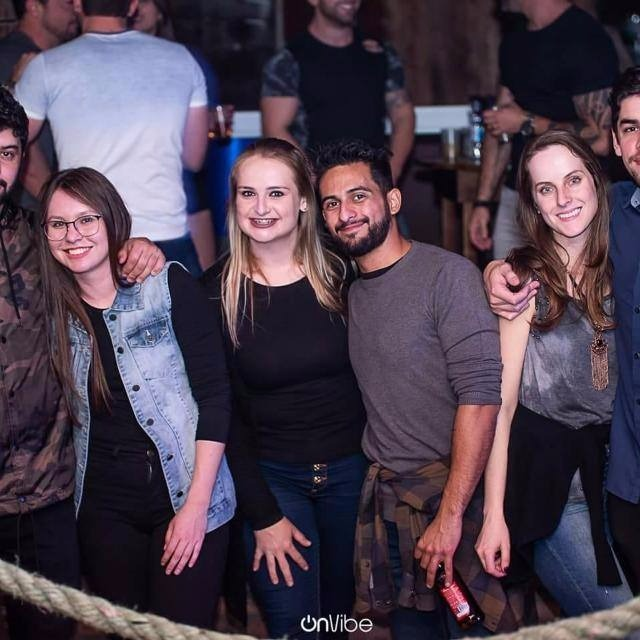

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(imagem)

In [ ]:
imagem_largura = imagem.shape[1]
imagem_altura = imagem.shape[0]

In [ ]:
imagem_largura, imagem_altura

(640, 640)

## **Etapa 5 - Ler o modelo carregado na Etapa 3**



In [ ]:
modelo = cv2.dnn.readNetFromCaffe(arquivo_proto, arquivo_pesos)

## **Etapa 6 - Definir as dimensões da imagem de entrada.**





In [ ]:
altura_entrada = 368
largura_entrada = int((altura_entrada / imagem_altura) * imagem_largura)

In [ ]:
largura_entrada

368

## **Etapa 7 - Converter a imagem do formato openCV para o formato blob Caffe**

In [ ]:
blob_entrada = cv2.dnn.blobFromImage(image = imagem, scalefactor = 1.0 / 255,
                                     size = (largura_entrada, altura_entrada),
                                     mean = (0, 0, 0), swapRB = False, crop = False)

## **Etapa 8 - Saída**

In [ ]:
modelo.setInput(blob_entrada)
saida = modelo.forward()

In [ ]:
saida.shape

(1, 44, 46, 46)

In [ ]:
saida[0].shape

(44, 46, 46)

In [ ]:
saida[0][0]

array([[0.00049211, 0.00054041, 0.00080379, ..., 0.0004188 , 0.00048497,
        0.00056237],
       [0.00053339, 0.00058671, 0.00055662, ..., 0.00045707, 0.00048965,
        0.00057936],
       [0.00051214, 0.00057875, 0.00055863, ..., 0.00052235, 0.00050592,
        0.00054233],
       ...,
       [0.00052932, 0.00052271, 0.00055545, ..., 0.00058366, 0.00061255,
        0.00079496],
       [0.0005545 , 0.00055393, 0.00056722, ..., 0.00065917, 0.00077181,
        0.00096974],
       [0.00058384, 0.00059913, 0.00055851, ..., 0.00086402, 0.00097046,
        0.0009022 ]], dtype=float32)

In [ ]:
ponto = 3
mapa_confianca = saida[0, ponto, :, :]
mapa_confianca = cv2.resize(mapa_confianca, (imagem_largura, imagem_altura))

(np.float64(-0.5), np.float64(639.5), np.float64(639.5), np.float64(-0.5))

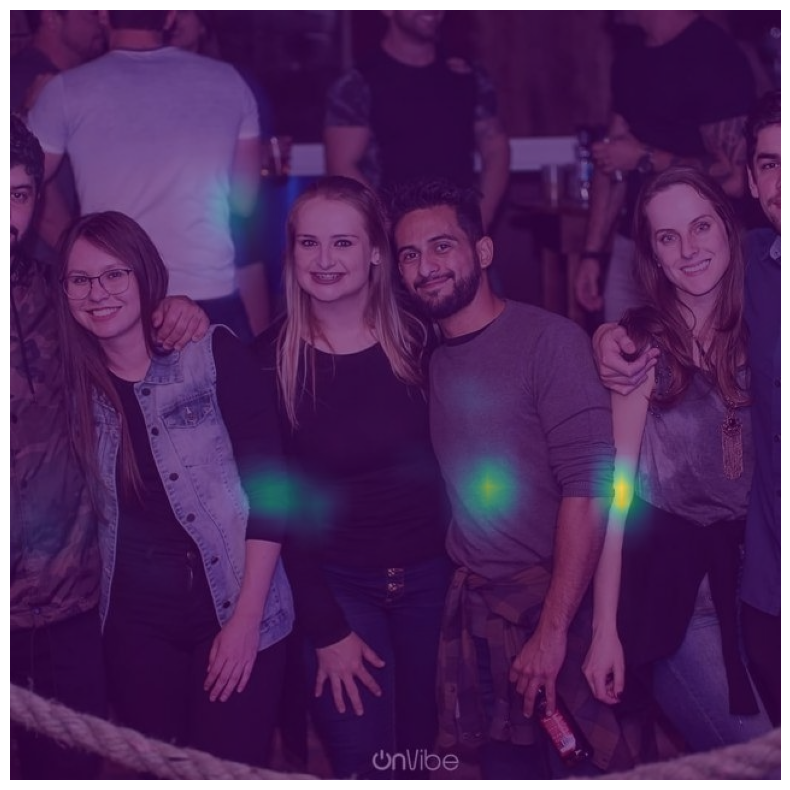

In [ ]:
plt.figure(figsize = [14, 10])
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
plt.imshow(mapa_confianca, alpha = 0.6)
plt.axis("off")

(np.float64(-0.5), np.float64(639.5), np.float64(639.5), np.float64(-0.5))

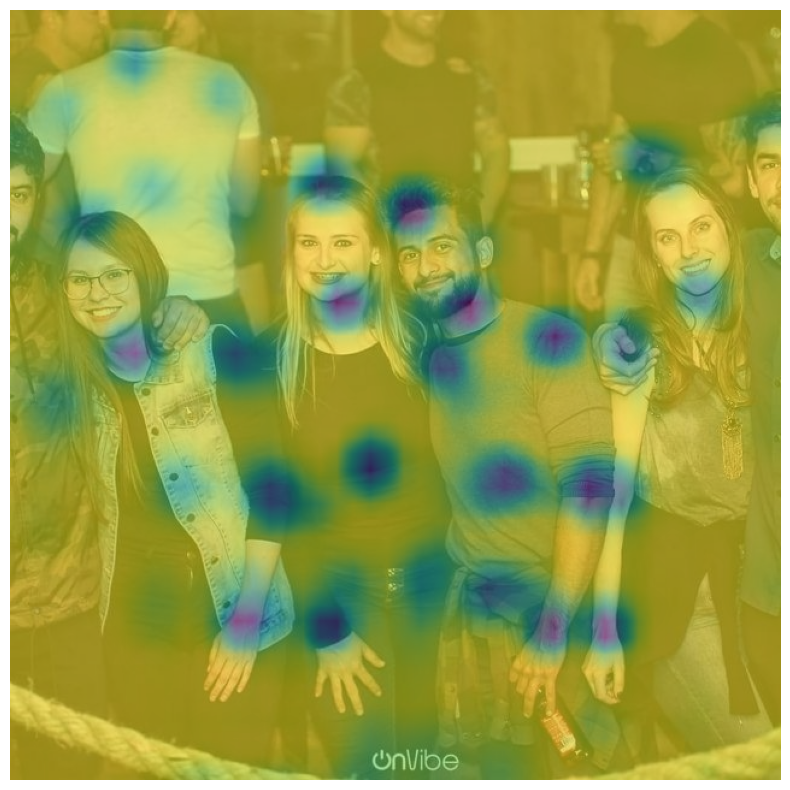

In [ ]:
ponto = 15
mapa_confianca = saida[0, ponto, :, :]
mapa_confianca = cv2.resize(mapa_confianca, (imagem_largura, imagem_altura))
plt.figure(figsize = [14, 10])
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
plt.imshow(mapa_confianca, alpha = 0.6)
plt.axis("off")